In [3]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


####FEATURE ENGINEERING

METHOD1-MEAN,MODE,MEDIAN IMPUTATION  ##data is  missing completely at random(MCAR)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [14]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [15]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1


In [16]:
median_age=df['Age'].median()
median_age

28.0

In [17]:
df['Age_median']=df['Age'].fillna(value=median_age)
df['Age_median']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age_median, Length: 891, dtype: float64

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,26.0


In [19]:
df['Age'].isnull().sum()

177

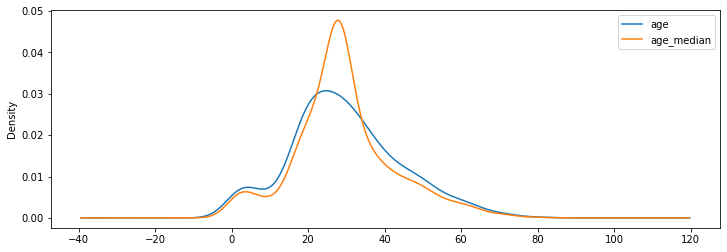

In [20]:
import matplotlib.pyplot as plt
df['Age'].plot(kind='kde',figsize=(12,4),label='age')
df['Age_median'].plot(kind='kde',label='age_median')
plt.legend()

METHOD2-RANDOM SAMPLE IMPUTATION ##data is  missing completely at random(MCAR)

In [14]:
import pandas as pd
df=pd.read_csv(r'C:\Users\TATA BHARATH YADAV\Desktop\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [16]:
df['Age'].isnull().sum()

177

In [17]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [18]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
a=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
a

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [20]:
a.index=df[df['Age'].isnull()].index
a.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [21]:
df.loc[df['Age'].isnull(),'Age_random']=a
a


5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [22]:
df['Age_random']=df['Age']
a=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
a.index=df[df['Age'].isnull()].index
df.loc[df['Age'].isnull(),'Age_random']=a

In [23]:
df

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,15.0
889,1,26.0,30.0000,26.0


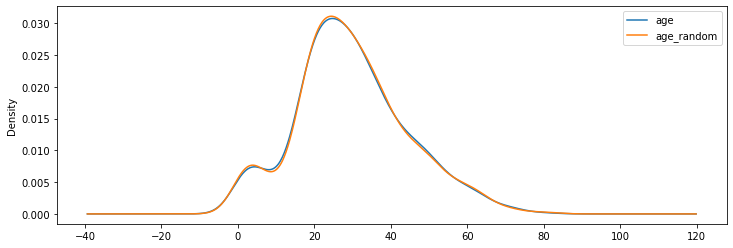

In [24]:
import matplotlib.pyplot as plt
df['Age'].plot(kind='kde',figsize=(12,4),label='age')
df['Age_random'].plot(kind='kde',label='age_random')
plt.legend()

METHOD3----Capturing NaN values with a new feature   ###data is not missing completely at random(some relationship is there)

In [25]:
import pandas as pd
df=pd.read_csv(r'C:\Users\TATA BHARATH YADAV\Desktop\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
import numpy as np
df['Age_NaN']=np.where(df['Age'].isnull(),1,0)


In [27]:
df

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [28]:
age_median=df['Age'].median()
age_median

28.0

In [29]:
df['Age'].fillna(value=age_median,inplace=True)

In [30]:
df.head(50)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


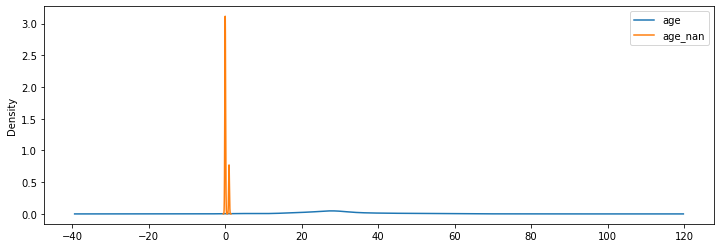

In [31]:
import matplotlib.pyplot as plt
df['Age'].plot(kind='kde',figsize=(12,4),label='age')
df['Age_NaN'].plot(kind='kde',label='age_nan')
plt.legend()

METHOD4--------End of Distribution Imputation    ###missing completely at random

In [32]:
import pandas as pd
df=pd.read_csv(r'C:\Users\TATA BHARATH YADAV\Desktop\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

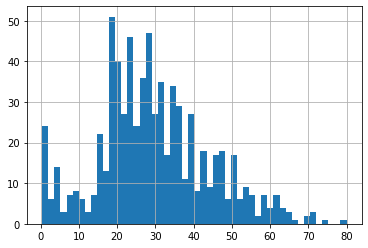

In [33]:
df['Age'].hist(bins=50)

In [34]:
extreme=df['Age'].mean()+3*df['Age'].std()
extreme####  mean+3(standard deviation)

73.27860964406095

In [35]:
age_median=df['Age'].median()
age_median

28.0

In [36]:
df['Age_enddistribution']=df['Age'].fillna(value=extreme)
df['Age']=df['Age'].fillna(value=age_median)

In [37]:
df

,Survived,Age,Fare,Age_enddistribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


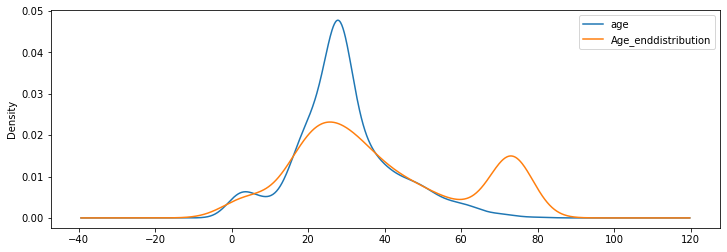

In [38]:
import matplotlib.pyplot as plt
df['Age'].plot(kind='kde',figsize=(12,4),label='age')
df['Age_enddistribution'].plot(kind='kde',label='Age_enddistribution')
plt.legend()

<AxesSubplot:>

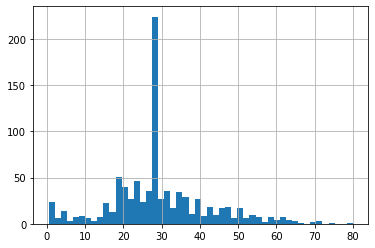

In [39]:
df['Age'].hist(bins=50)

<AxesSubplot:>

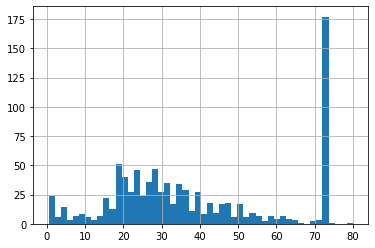

In [40]:
df['Age_enddistribution'].hist(bins=50)

METHOD 5---------Arbitrary value imputation

In [41]:
import pandas as pd
df=pd.read_csv(r'C:\Users\TATA BHARATH YADAV\Desktop\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
df['Age100']=df['Age'].fillna(value=100)
df['Age100']

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888    100.0
889     26.0
890     32.0
Name: Age100, Length: 891, dtype: float64

In [43]:
df

,Survived,Age,Fare,Age100
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,100.0
889,1,26.0,30.0000,26.0


In [44]:
df['Age0']=df['Age'].fillna(value=0)
df['Age0']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age0, Length: 891, dtype: float64

In [45]:
df

,Survived,Age,Fare,Age100,Age0
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,100.0,0.0
889,1,26.0,30.0000,26.0,26.0


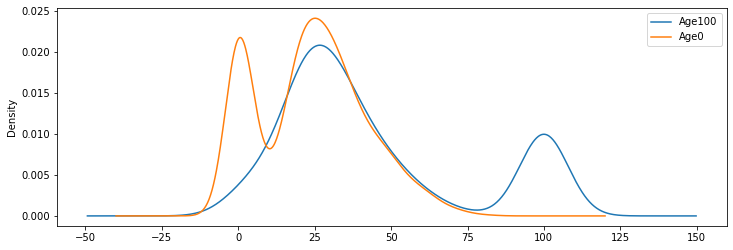

In [46]:
import matplotlib.pyplot as plt
df['Age100'].plot(kind='kde',figsize=(12,4),label='Age100')
df['Age0'].plot(kind='kde',label='Age0')
plt.legend()

METHOD 6--------How to handle categorical missing values
1)Frequent categorical imputation

In [47]:
import pandas as pd
df=pd.read_csv('houseplan.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [49]:
df=pd.read_csv('houseplan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [51]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [52]:
df.sort_values(by='SalePrice',ascending=True).head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice
495,TA,NaN,NaN,34900
916,TA,NaN,Detchd,35311
968,TA,NaN,NaN,37900
533,NaN,NaN,NaN,39300
30,TA,NaN,Detchd,40000
710,TA,NaN,NaN,52000
1337,TA,NaN,NaN,52500
705,NaN,NaN,NaN,55000
1325,TA,NaN,NaN,55000
812,TA,NaN,Basment,55993


Compute the frequency with every feature

<AxesSubplot:xlabel='BsmtQual'>

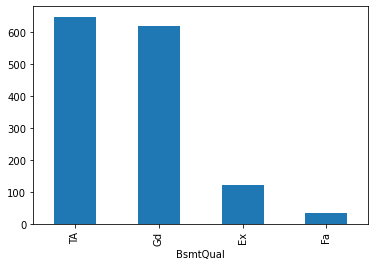

In [53]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

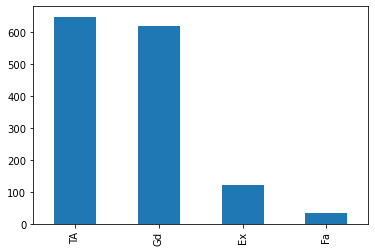

In [54]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

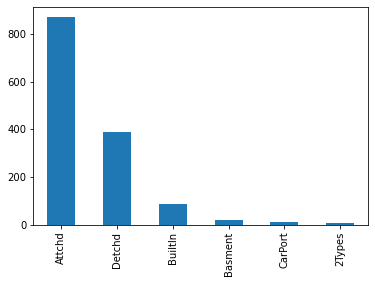

In [55]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

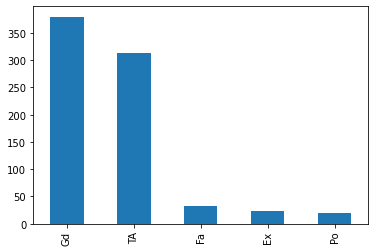

In [56]:
df['FireplaceQu'].value_counts().plot.bar()

In [84]:
a=df['GarageType'].value_counts().index[0]
a
#df['GarageType'].mode()[0]

'Attchd'

In [70]:
df['GarageType'].fillna(a,inplace=True)

In [59]:
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [72]:
b=df['BsmtQual'].value_counts().index[0]
df['BsmtQual'].fillna(value=b,inplace=True)

In [73]:
c=df['FireplaceQu'].value_counts().index[0]
df['FireplaceQu'].fillna(value=c,inplace=True)

In [74]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [75]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [76]:
def impute_nan(df,variable):
    most_freq_category=df[variable].value_counts().index[0]
    df[variable].fillna( most_freq_category,inplace=True)

In [77]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [78]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [80]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

2)Adding a variable to capture NaN

In [181]:
df=pd.read_csv('houseplan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [182]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [183]:
def impute_nan(df,variable):
    df[variable +'newvar']=np.where(df[variable].isnull(),'MISSING',df[variable])
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [184]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,MISSING,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [185]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)
frequent=df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace=True)

In [186]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent1=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent1,inplace=True)

In [187]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,Gd,MISSING,Attchd,0,1
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,0,0
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,0,0
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,0,0
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,0,0


In [188]:
df['GarageType_var']=np.where(df['GarageType'].isnull(),1,0)
frequent2=df['GarageType'].mode()[0]
df['GarageType'].fillna(frequent2,inplace=True)

In [189]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,Gd,Attchd,208500,Gd,MISSING,Attchd,0,1,0
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,0,0,0
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,0,0,0
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,0,0,0
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,0,0,0


In [191]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType','BsmtQual_var','FireplaceQu_var','GarageType_var'],axis=1)
df.head(50)

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,MISSING,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
5,143000,Gd,MISSING,Attchd
6,307000,Ex,Gd,Attchd
7,200000,Gd,TA,Attchd
8,129900,TA,TA,Detchd
9,118000,TA,TA,Attchd


####Handling categorical features

# one hot encoding

In [192]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [195]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [200]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [201]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [202]:
pd.get_dummies(df).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [203]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


###one hot encoding with many categories in a feature

In [205]:
df=pd.read_csv('benz.csv')
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [206]:
df=pd.read_csv('benz.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [209]:
df['X0'].value_counts()
#for i in df.columns:
    #print(df[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [210]:
df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [211]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [218]:
df['X1'].value_counts()
pd.get_dummies(df)

,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [215]:
df1=df['X1'].value_counts().sort_values(ascending=False).head(10)
df1

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [216]:
pd.get_dummies(df1)

,82,121,143,203,251,408,590,592,598,833
aa,0,0,0,0,0,0,0,0,0,1
s,0,0,0,0,0,0,0,0,1,0
b,0,0,0,0,0,0,0,1,0,0
l,0,0,0,0,0,0,1,0,0,0
v,0,0,0,0,0,1,0,0,0,0
r,0,0,0,0,1,0,0,0,0,0
i,0,0,0,1,0,0,0,0,0,0
a,0,0,1,0,0,0,0,0,0,0
c,0,1,0,0,0,0,0,0,0,0
o,1,0,0,0,0,0,0,0,0,0


In [219]:
ls_10=df['X1'].value_counts().sort_values(ascending=False).head(10).index
ls_10=list(ls_10)
ls_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [220]:
import numpy as np
for categories in ls_10:
    df[categories]=np.where(df['X1']==categories,1,0)


In [224]:
ls_10.append('X1')

In [226]:
df[ls_10].head()

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
